# Limpieza de Datos

### Importar librerias

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

### Cargar Archivo CSV

In [113]:
df=pd.read_csv("datos_apartamentos_rent.csv")

### Eliminación de variables descriptivas o poco significativas

In [114]:
df=df.drop(['id','title','body','currency','fee','address','source','state'],axis=1)


In [115]:
df.head()

,category,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price,price_display,price_type,square_feet,cityname,latitude,longitude,time
0,housing/rent/apartment,NaN,NaN,0.0,Thumbnail,NaN,790,790,Monthly,101,Washington,389057.0,-769861.0,1577359415
1,housing/rent/apartment,NaN,NaN,1.0,Thumbnail,NaN,425,425,Monthly,106,Evansville,379680.0,-876621.0,1577017063
2,housing/rent/apartment,NaN,1.0,0.0,Thumbnail,NaN,1390,1.39,Monthly,107,Arlington,388910.0,-770816.0,1577359410
3,housing/rent/apartment,NaN,1.0,0.0,Thumbnail,NaN,925,925,Monthly,116,Seattle,476160.0,-1223275.0,1576667743
4,housing/rent/apartment,NaN,NaN,0.0,Thumbnail,NaN,880,880,Monthly,125,Arlington,388738.0,-771055.0,1577359401


In [116]:
df.shape

(10000, 14)

In [117]:
df.describe()

,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,9966.000000,9993.000000,10000.000000,10000.000000,9990.000000,9.990000e+03,1.000000e+04
mean,1.380544,1.744021,1486.277500,945.810500,376951.620420,-9.465225e+05,1.574891e+09
std,0.615410,0.942354,1076.507968,655.755736,54958.509131,1.575980e+05,3.762395e+06
min,1.000000,0.000000,200.000000,101.000000,213155.000000,-1.580221e+06,1.568744e+09
25%,1.000000,1.000000,949.000000,649.000000,336798.500000,-1.013017e+06,1.568781e+09
50%,1.000000,2.000000,1270.000000,802.000000,388098.000000,-9.365160e+05,1.577358e+09
75%,2.000000,2.000000,1695.000000,1100.000000,413498.000000,-8.220998e+05,1.577359e+09
max,8.500000,9.000000,52500.000000,40000.000000,615940.000000,-7.019160e+05,1.577362e+09


### Revisión de Duplicados en el DF

In [118]:
duplicates=len(df[df.duplicated()])
print(f'Numer of Duplicates Entries:{duplicates}')

Numer of Duplicates Entries:8


### Eliminación de Duplicados

In [119]:
df=df.drop_duplicates()

### Revisar faltantes por columna

In [120]:
print(df.isnull().sum())

category            0
amenities        3545
bathrooms          34
bedrooms            7
has_photo           0
pets_allowed     4160
price               0
price_display       0
price_type          0
square_feet         0
cityname           75
latitude           10
longitude          10
time                0
dtype: int64


### Eliminación de algunas columnas con faltantes

In [121]:
df=df.drop(['amenities','pets_allowed'],axis=1)

### Modificación de faltantes

In [122]:
df=df.dropna(subset=['cityname', 'latitude'])

In [123]:
df.loc[:,'bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())
df.loc[:,'bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())

### Revisión de faltantes

In [124]:
print(df.isnull().sum())

category         0
bathrooms        0
bedrooms         0
has_photo        0
price            0
price_display    0
price_type       0
square_feet      0
cityname         0
latitude         0
longitude        0
time             0
dtype: int64


### Tipos de datos en el dataset

In [125]:
types = df.dtypes.value_counts()

print('Number of Features: %d'%(df.shape[1]))
print('Number of Customers: %d'%(df.shape[0]))
print('Data Types and Frequency in Dataset:')
print(types)

Number of Features: 12
Number of Customers: 9917
Data Types and Frequency in Dataset:
object     5
float64    4
int64      3
Name: count, dtype: int64


### Análisis de valores atipicos

In [126]:
datos_numericos = df.select_dtypes(include=['float64', 'int64'])

In [127]:
Q1 = datos_numericos.quantile(0.25)
Q3 = datos_numericos.quantile(0.75)
IQR = Q3 - Q1

# Identificar outliers
outliers = ((datos_numericos < (Q1 - 1.5 * IQR)) | (datos_numericos > (Q3 + 1.5 * IQR)))

print(outliers)

      bathrooms  bedrooms  price  square_feet  latitude  longitude   time
0         False     False  False        False     False      False  False
1         False     False  False        False     False      False  False
2         False     False  False        False     False      False  False
3         False     False  False        False     False      False  False
4         False     False  False        False     False      False  False
...         ...       ...    ...          ...       ...        ...    ...
9995       True      True   True         True     False      False  False
9996       True      True   True         True     False      False  False
9997       True      True   True         True     False      False  False
9998      False     False   True         True     False      False  False
9999      False     False  False        False     False      False  False

[9917 rows x 7 columns]


In [128]:
print(outliers.sum())

bathrooms       72
bedrooms       508
price          613
square_feet    618
latitude        56
longitude       56
time             0
dtype: int64


In [129]:
df_cleaned=df[(outliers==False).all(axis=1)]
print(df_cleaned)

                    category  bathrooms  bedrooms  has_photo  price  \
0     housing/rent/apartment        1.0       0.0  Thumbnail    790   
1     housing/rent/apartment        1.0       1.0  Thumbnail    425   
2     housing/rent/apartment        1.0       0.0  Thumbnail   1390   
3     housing/rent/apartment        1.0       0.0  Thumbnail    925   
4     housing/rent/apartment        1.0       0.0  Thumbnail    880   
...                      ...        ...       ...        ...    ...   
9372  housing/rent/apartment        2.0       3.0  Thumbnail   1449   
9373  housing/rent/apartment        3.0       3.0  Thumbnail   1299   
9375  housing/rent/apartment        2.0       3.0  Thumbnail   2000   
9376  housing/rent/apartment        2.0       3.0  Thumbnail   1400   
9999  housing/rent/apartment        1.0       1.0         No   1009   

     price_display price_type  square_feet       cityname  latitude  \
0              790    Monthly          101     Washington  389057.0   
1    

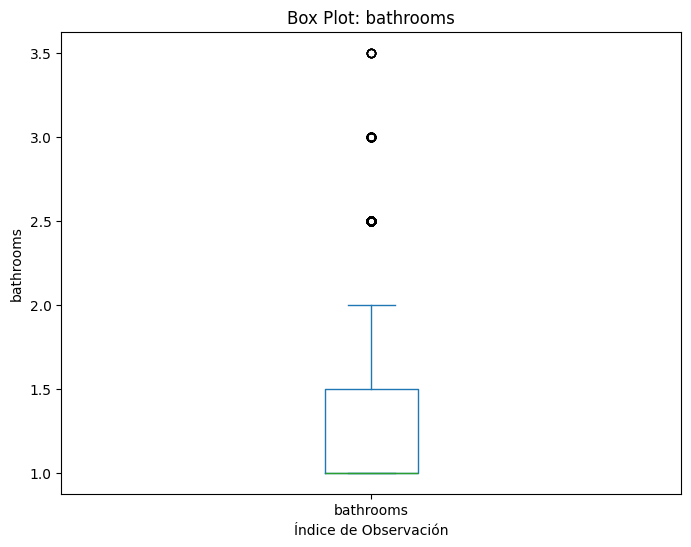

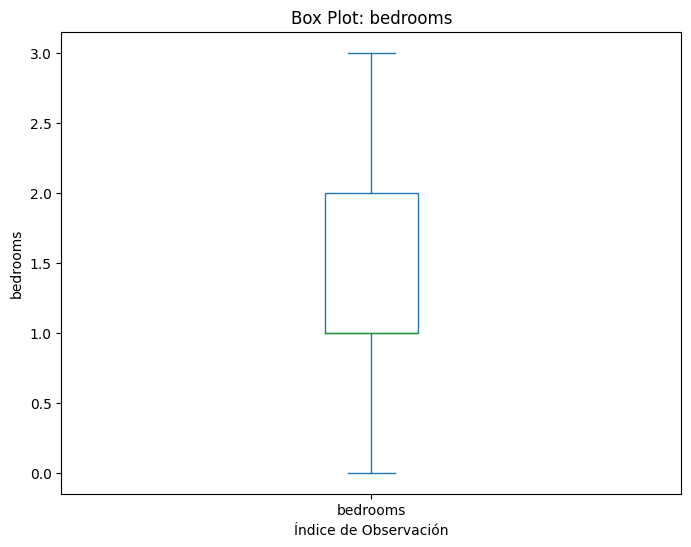

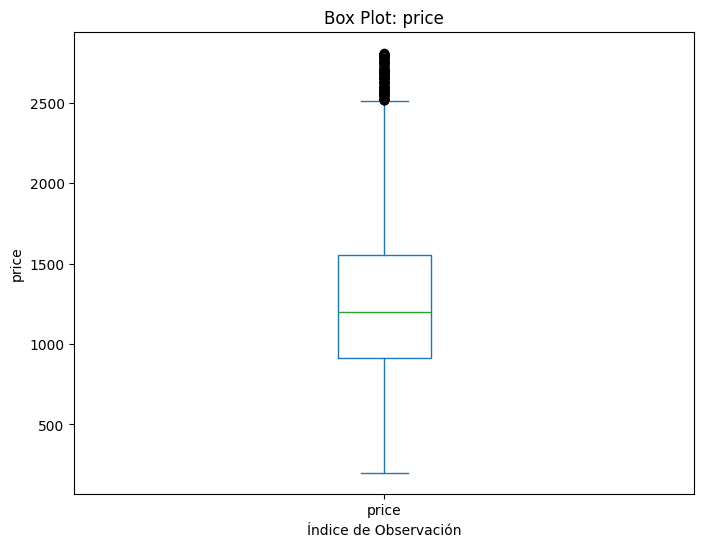

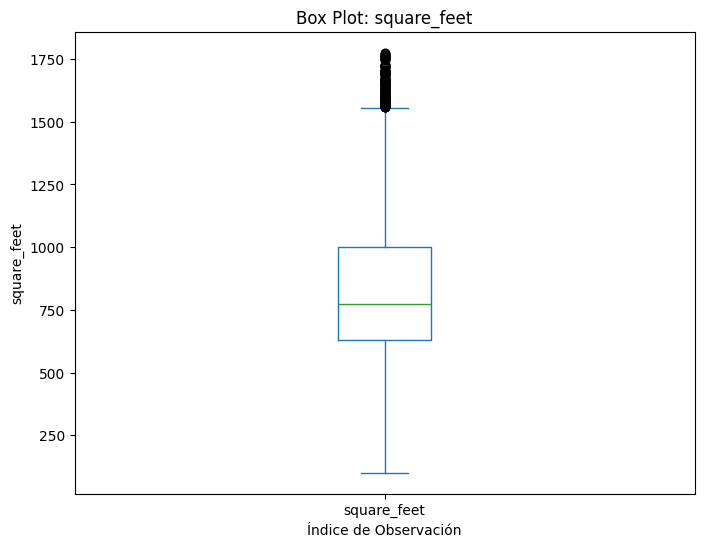

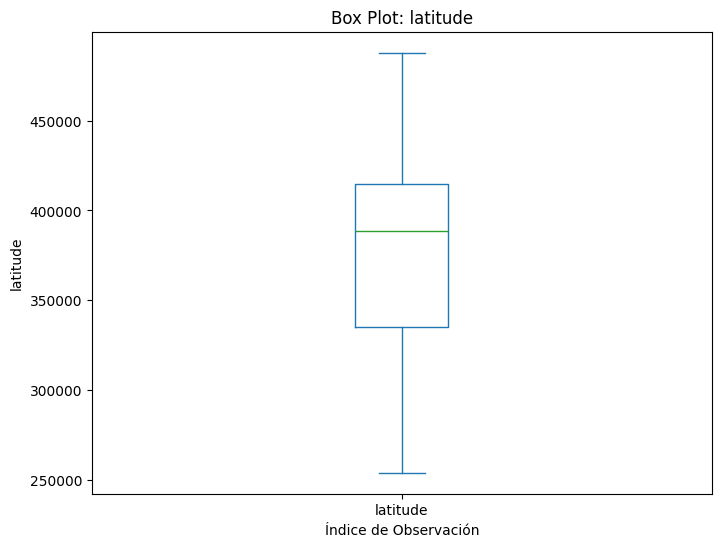

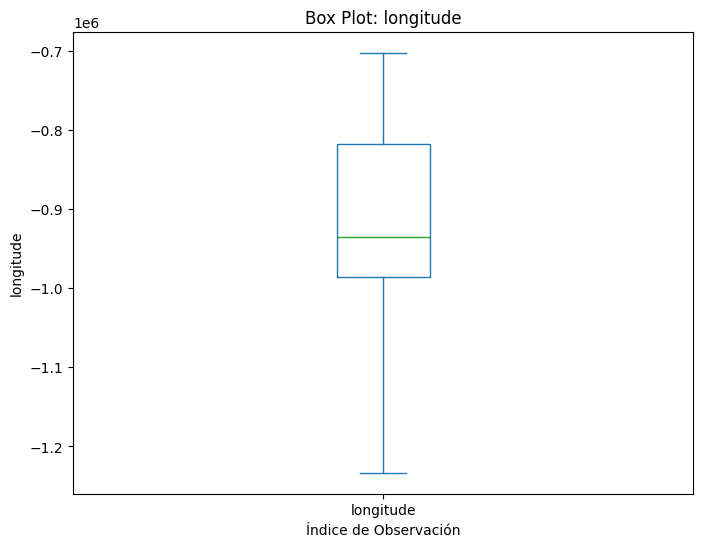

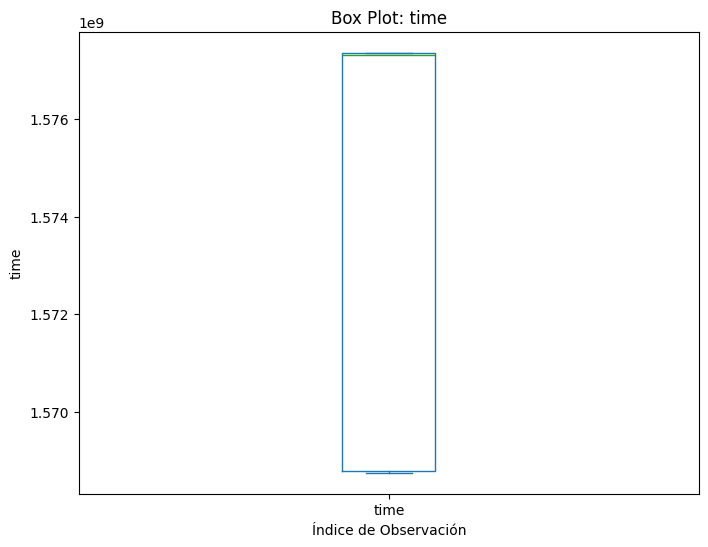

In [130]:
for column in datos_numericos.columns:
    plt.figure(figsize=(8, 6))
    df_cleaned[column].plot(kind='box')
    plt.title(f'Box Plot: {column}')
    plt.xlabel('Índice de Observación')
    plt.ylabel(column)
    plt.show()

In [131]:
df.dtypes

category          object
bathrooms        float64
bedrooms         float64
has_photo         object
price              int64
price_display     object
price_type        object
square_feet        int64
cityname          object
latitude         float64
longitude        float64
time               int64
dtype: object

In [132]:
catcols = df_cleaned.select_dtypes(exclude = ['int64','float64']).columns
 
data_dummie = pd.get_dummies(df_cleaned, columns = catcols, dtype=int, drop_first=True)

data_dummie


,bathrooms,bedrooms,price,square_feet,latitude,longitude,time,category_housing/rent/home,category_housing/rent/short_term,has_photo_Thumbnail,...,cityname_Yakima,cityname_Yonkers,cityname_York,cityname_Yorktown,cityname_Yorkville,cityname_Youngstown,cityname_Youngsville,cityname_Ypsilanti,cityname_Yukon,cityname_Zachary
0,1.0,0.0,790,101,389057.0,-769861.0,1577359415,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,425,106,379680.0,-876621.0,1577017063,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,1390,107,388910.0,-770816.0,1577359410,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0.0,925,116,476160.0,-1223275.0,1576667743,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0.0,880,125,388738.0,-771055.0,1577359401,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,2.0,3.0,1449,1767,300871.0,-954685.0,1577358355,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9373,3.0,3.0,1299,1772,339531.0,-812381.0,1577359139,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9375,2.0,3.0,2000,1775,272688.0,-825169.0,1568748142,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9376,2.0,3.0,1400,1776,388098.0,-899522.0,1577360557,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [133]:
df_cleaned['cityname'].value_counts()

cityname
Austin           519
Dallas           208
Houston          181
San Antonio      175
Chicago          129
                ... 
Channelview        1
Palm Desert        1
Platte City        1
Williamsport       1
Pingree Grove      1
Name: count, Length: 1423, dtype: int64

In [134]:
X=data_dummie
var_ret=[]
for i in X.columns:
    if X[i].sum() <87: #se eliminan columnas que tengan más de 95% de datos iguales 2260 es el 5% de la cantidad total de datos
         var_ret.append(i)

# Eliminar las columnas del dataframe
data_dummie.drop(columns=var_ret, inplace=True)


print(var_ret)
print(len(var_ret))


data_dummie

['longitude', 'category_housing/rent/home', 'category_housing/rent/short_term', 'price_display_$275 Monthly|Weekly', 'price_display_1', 'price_display_1.001', 'price_display_1.002', 'price_display_1.003', 'price_display_1.004', 'price_display_1.005', 'price_display_1.007', 'price_display_1.009', 'price_display_1.01', 'price_display_1.011', 'price_display_1.012', 'price_display_1.013', 'price_display_1.014', 'price_display_1.015', 'price_display_1.016', 'price_display_1.017', 'price_display_1.018', 'price_display_1.019', 'price_display_1.02', 'price_display_1.021', 'price_display_1.022', 'price_display_1.023', 'price_display_1.024', 'price_display_1.025', 'price_display_1.026', 'price_display_1.027', 'price_display_1.028', 'price_display_1.029', 'price_display_1.03', 'price_display_1.031', 'price_display_1.032', 'price_display_1.033', 'price_display_1.034', 'price_display_1.035', 'price_display_1.036', 'price_display_1.037', 'price_display_1.039', 'price_display_1.04', 'price_display_1.

,bathrooms,bedrooms,price,square_feet,latitude,time,has_photo_Thumbnail,has_photo_Yes,cityname_Arlington,cityname_Austin,cityname_Chicago,cityname_Dallas,cityname_Denver,cityname_Houston,cityname_Kansas City,cityname_Los Angeles,cityname_Madison,cityname_Portland,cityname_San Antonio
0,1.0,0.0,790,101,389057.0,1577359415,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,1.0,425,106,379680.0,1577017063,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,1390,107,388910.0,1577359410,1,0,1,0,0,0,0,0,0,0,0,0,0
3,1.0,0.0,925,116,476160.0,1576667743,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,0.0,880,125,388738.0,1577359401,1,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,2.0,3.0,1449,1767,300871.0,1577358355,1,0,0,0,0,0,0,0,0,0,0,0,0
9373,3.0,3.0,1299,1772,339531.0,1577359139,1,0,0,0,0,0,0,0,0,0,0,0,0
9375,2.0,3.0,2000,1775,272688.0,1568748142,1,0,0,0,0,0,0,0,0,0,0,0,0
9376,2.0,3.0,1400,1776,388098.0,1577360557,1,0,0,0,0,0,0,0,0,0,0,0,0


In [88]:
print(list(data_dummie.columns))

['bathrooms', 'bedrooms', 'price', 'square_feet', 'latitude', 'time', 'has_photo_Thumbnail', 'has_photo_Yes', 'cityname_Arlington', 'cityname_Austin', 'cityname_Chicago', 'cityname_Dallas', 'cityname_Denver', 'cityname_Houston', 'cityname_Kansas City', 'cityname_Los Angeles', 'cityname_Madison', 'cityname_Portland', 'cityname_San Antonio']


In [ ]:

var_ret=[]
if data_dummie['cityname_Grand Forks'].sum() <9: #se eliminan columnas que tengan más de 95% de datos iguales 2260 es el 5% de la cantidad total de datos
         
         var_ret.append(i)

# Eliminar las columnas del dataframe
data_dummie.drop(columns=var_ret, inplace=True)


print(var_ret)
print(len(var_ret))


data_dummie.head()

### Multicolineadlidad

In [135]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Añadir constante a X para calcular VIF
X_with_const = sm.add_constant(data_dummie)

# Calcular VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]


for i in range(1,len(vif_data)):
    if vif_data["VIF"][i]>5:
        print(vif_data["Variable"][i],vif_data["VIF"][i])

c:\Users\paula\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


has_photo_Thumbnail 6.037878336506903
has_photo_Yes 5.620659453692263


In [36]:
data_dummie.to_csv('Data_limpia_dummies.csv', index=False)

In [138]:
df_cleaned.to_csv('Data_limpia.csv', index=False)